In [1]:
from beschess.load import load_game
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


%load_ext autoreload
%autoreload 2

In [2]:
games = load_game.load_headers_csv(r'../data/headers.csv')
games

,Unnamed: 0,Game Type,White.Name,Black.Name,Winner,White.Elo,Black.Elo,Time Control
0,0,Rated Classical game,BFG9k,mamalak,1-0,1639.0,1403.0,600+8
1,1,Rated Classical game,Desmond_Wilson,savinka59,1-0,1654.0,1919.0,480+2
2,2,Rated Classical game,Kozakmamay007,VanillaShamanilla,1-0,1643.0,1747.0,420+17
3,3,Rated Bullet game,Naitero_Nagasaki,800,0-1,1824.0,1973.0,60+1
4,4,Rated Bullet game,nichiren1967,Naitero_Nagasaki,0-1,1765.0,1815.0,60+1
...,...,...,...,...,...,...,...,...
121327,121327,Rated Classical game,Yudhisthira,netsah08,0-1,1854.0,1937.0,600+10
121328,121328,Rated Classical game,Daler,kualalumpur,0-1,1500.0,1266.0,720+0
121329,121329,Rated Classical game,senip,Richard_XII,0-1,1431.0,1523.0,960+6
121330,121330,Rated Blitz game,van9,shueardm,1-0,1693.0,1479.0,180+1


1600.482 205.95963
36 0.0025279031206949178 ModeResult(mode=np.float32(1500.0), count=np.int64(4917)) ModeResult(mode=np.float32(1662.0), count=np.int64(530)) ModeResult(mode=np.float32(1662.0), count=np.int64(530)) ModeResult(mode=np.float32(1662.0), count=np.int64(530))


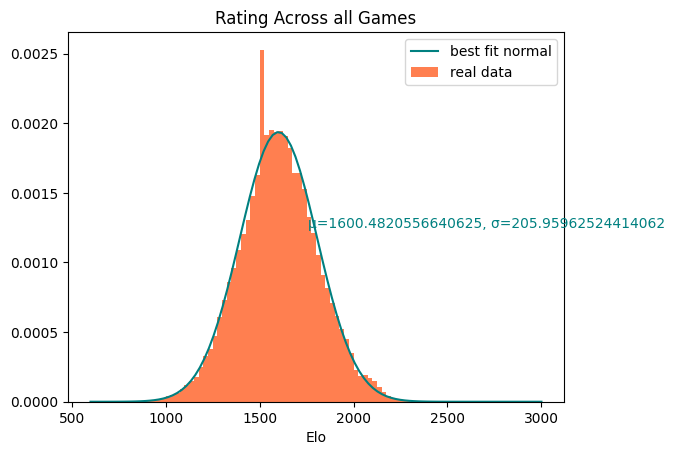

In [3]:
w_elo = games["White.Elo"].dropna().to_numpy(dtype=np.float32)
w_elo_g11 = games[games["White.Name"] == 'german11']["White.Elo"].dropna().to_numpy(dtype=np.float32)
b_elo_g11 = games[games["Black.Name"] == 'german11']["Black.Elo"].dropna().to_numpy(dtype=np.float32)
b_elo = games["Black.Elo"].dropna().to_numpy(dtype=np.float32)
all_elo = np.concatenate((w_elo, b_elo))

from scipy import stats

mu = all_elo.mean()
sigma = all_elo.std()

print(mu, sigma)

X = np.linspace(600, 3000, 100)
plt.plot(X, stats.norm.pdf(X, mu, sigma), label='best fit normal', color='teal')

plt.title("Rating Across all Games")
plt.xlabel("Elo")
heights,_,_ = plt.hist(all_elo, bins=np.arange(600, 3000, 25), density=True, label='real data', color='coral')

no_1500 = all_elo[all_elo != 1500]
no_1400 = no_1500[no_1500 != 1400]
no_1501 = no_1400[no_1400 != 1501]
print(heights.argmax(), heights.max(), stats.mode(all_elo), stats.mode(no_1500), stats.mode(no_1400), stats.mode(no_1501))
plt.text(1755, 0.00125, f"μ={mu}, σ={sigma}", color='teal')
plt.legend()
plt.show()

White.Name
german11             1577
nichiren1967         1066
F1_ALONSO_FERRARI     873
Oz                    793
ChikiPuki             751
                     ... 
susanin                 1
Rygardo                 1
after-forever           1
StandByPhasers          1
aerson                  1
Name: count, Length: 4247, dtype: int64
1577
876


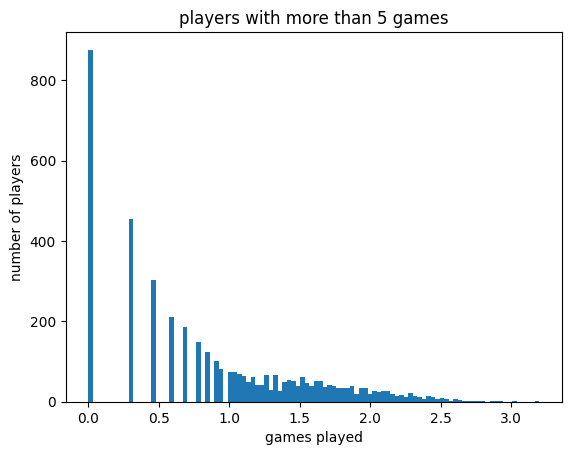

In [4]:
names = games['White.Name']
x = list(set(games['White.Name']))

counts = names.value_counts()
print(counts)
print(counts.max())

print(len([counts[name] for name in x if counts[name] <= 1]))

# plt.hist([counts[name] for name in x if counts[name] > 5])

plt.hist([np.log10(counts[name]) for name in x], bins=100)
plt.title("players with more than 5 games")
plt.xlabel("games played")
plt.ylabel("number of players")
plt.show()

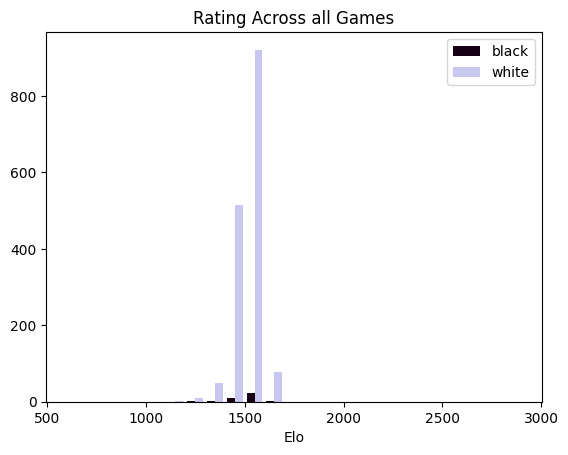

In [5]:
plt.title("Rating Across all Games")
plt.xlabel("Elo")
plt.hist([b_elo_g11, w_elo_g11], bins=np.arange(600, 3000, 100), label=['black', 'white'], color=['#150015', '#c7c7ef'])

plt.legend()
plt.show()

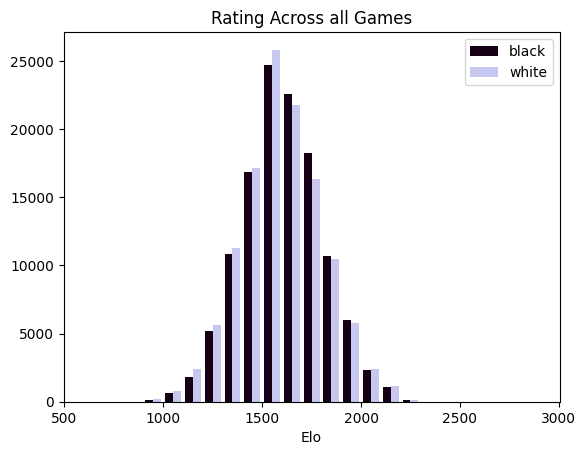

In [6]:
plt.title("Rating Across all Games")
plt.xlabel("Elo")
plt.hist([w_elo, b_elo], bins=np.arange(600, 3000, 100), label=['black', 'white'], color=['#150015', '#c7c7ef'])

plt.legend()
plt.show()

In [8]:
games.head()

,Unnamed: 0,Game Type,White.Name,Black.Name,Winner,White.Elo,Black.Elo,Time Control
0,0,Rated Classical game,BFG9k,mamalak,1-0,1639.0,1403.0,600+8
1,1,Rated Classical game,Desmond_Wilson,savinka59,1-0,1654.0,1919.0,480+2
2,2,Rated Classical game,Kozakmamay007,VanillaShamanilla,1-0,1643.0,1747.0,420+17
3,3,Rated Bullet game,Naitero_Nagasaki,800,0-1,1824.0,1973.0,60+1
4,4,Rated Bullet game,nichiren1967,Naitero_Nagasaki,0-1,1765.0,1815.0,60+1


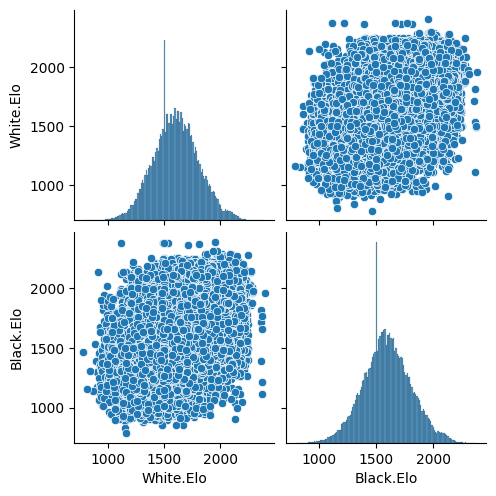

In [10]:
sns.pairplot(games[['White.Elo', 'Black.Elo']])